## Задача 4. Шолохов Алексей, 474гр.

In [1]:
import numpy as np
from numpy import sin, cos, pi
from scipy.linalg import lu
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Решим интегральное уравнение Фредгольма второго рода с помощью квадратурной формулы средней точки. Тогда эта задача сводится к решению системы линейных уравнений вида:

$\sum_{m=1}^n[\delta_{nm} - \lambda K_{nm}]u_m = f_n, \quad n \in [1, N]$

где: $K_{nm} = h^2|n-m|$ - симметричная матрица ядра размером $N \times N$

$h = \frac{2\pi}{N}$, $\delta_{nm}$ - единичная матрица, а $f_n = f(x_n)$, $x_n = -\pi + (n-\frac{1}{2})h$

$\lambda = 0.01$, $N = 100$

Решим эту систему методом Зейделя. Сначала зададим систему:

In [14]:
N = 100
lamb = 0.01
h = 2*pi/N
eps = 10e-6

def matrix(n,m):
    return -lamb*h**2*np.abs(n-m) + (1 if n==m else 0)

def f(x):
    return (1+2*lamb)*np.cos(x/2)**2 - lamb*(x**2+pi**2)/2

Xn = [-pi + (n-1/2)*h for n in range(1,N+1)]

M = [[matrix(n, m) for m in range(1, N+1)] for n in range(1, N+1)]

F = [f(x) for x in Xn]

Имплементация метода Зейдля совершенно классическая, совпадает с википедией

In [2]:
def seidel(m, b, eps=10e-6):
    n = len(m)
    r = range(n)
    x = [0 for i in r]
    iter_counter = 0
    conv = False
    while not conv:
        p = x.copy()
        for i in r:
            var = sum(m[i][j] * x[j] for j in range(i))
            var += sum(m[i][j] * p[j] for j in range(i+1, n))
            x[i] = (b[i] - var) / m[i][i]

        conv = sum((x[i]-p[i])**2 for i in r) < eps
        iter_counter+=1
    return x, iter_counter

Видно, что для сходимости при заданной точности методу Зейделя понадобилось всего четыре итерации:

In [17]:
X, steps = seidel(M, F, eps)
steps

4

Сравним $X$ с истинным решением $cos^2\frac{x}{2}$. Видно, что ошибка решения минимальна до неразличимости.

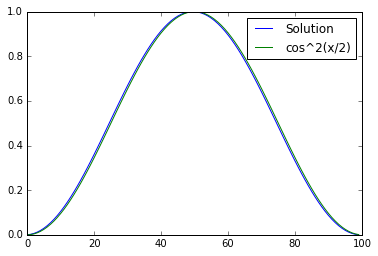

In [12]:
pylab.plot(range(len(X)), X, label="Solution")
pylab.plot(range(len(X)), [cos(-pi/2 + pi*x/100)**2 for x in range(len(X))], label="cos^2(x/2)")
pylab.legend()